<a href="https://colab.research.google.com/github/haidaroktafiansyah/PCVK_Genap_2021/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
from google.colab import drive

drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


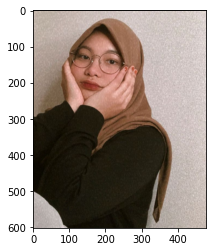

In [39]:
import cv2 as cv 
from google.colab.patches import cv2_imshow 
from skimage import io 
import matplotlib.pyplot as plt 
import numpy as np 

img = cv.imread('/content/drive/MyDrive/Uyey.png')
image = cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(image)

-------------------------
* kasih 1-3 ya kakak(koma gak apa-apa) [1.0-3.0]: 1.5
* 0-255 ya kaka (gak boleh koma) [0-255]: 0


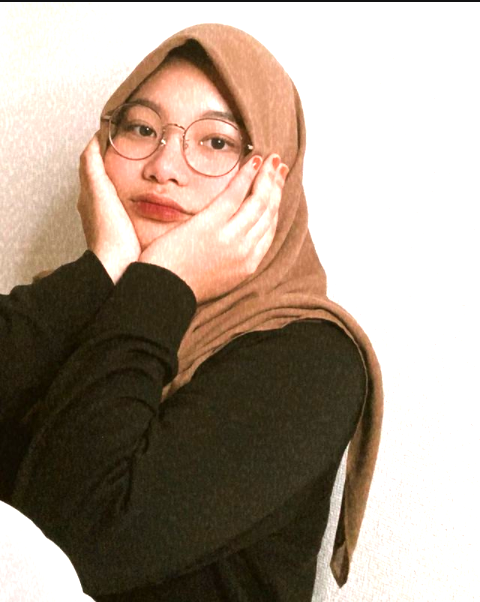

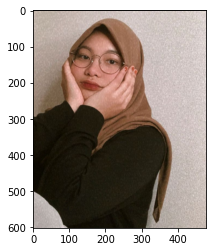

In [40]:
new_image = np.zeros(image.shape, image.dtype)

# Initialize values
print('-------------------------')
try:
    alpha = float(input('* kasih 1-3 ya kakak(koma gak apa-apa) [1.0-3.0]: '))
    beta = int(input('* 0-255 ya kaka (gak boleh koma) [0-255]: '))
except ValueError:
    print('Inpute Angka Woy')

# Instead of these 'for' loops we could have used simply:
# new_image = cv.convertScaleAbs(image, alpha=alpha, beta=beta)

for y in range(image.shape[0]):
    for x in range(image.shape[1]):
        for c in range(image.shape[2]):
            new_image[y,x,c] = np.clip(alpha*image[y,x,c] + beta, 0, 255)
plt.imshow(image)
cv2_imshow(cv.cvtColor(new_image,cv.COLOR_BGR2RGB))

 mengubah tingkat kecerahan citra dengan transform log 
 -------------------------------- 
Masukan nilai kecerahan: 60


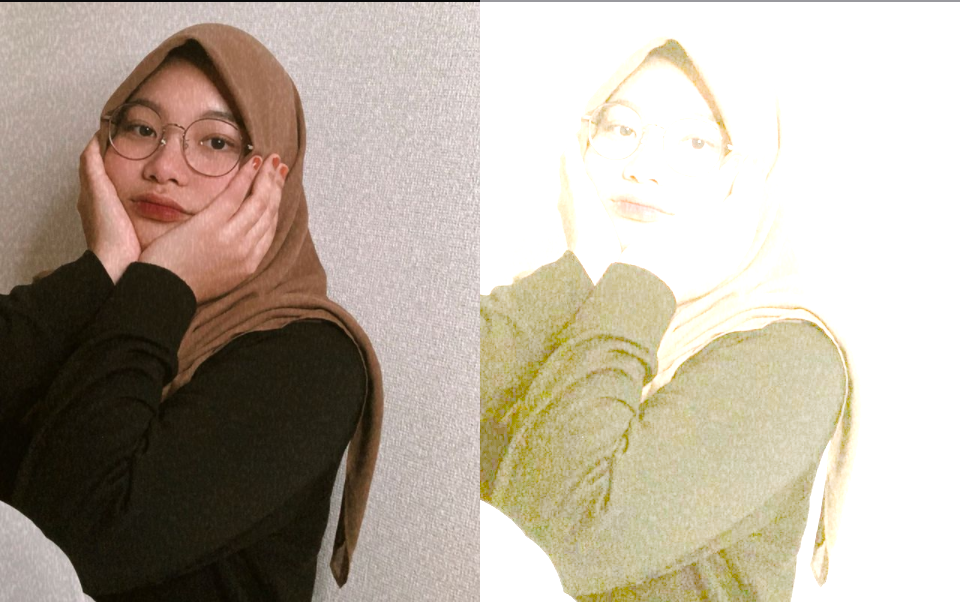

In [68]:
print(' mengubah tingkat kecerahan citra dengan transform log ')
print(' -------------------------------- ')

try:
  brightness = int(input('Masukan nilai kecerahan: '))
except ValueError:
  print('Error, bukan angka')

original = image
brightness_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(brightness*(np.log(1.0+original[y,x,c])), 0, 255)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(cv.cvtColor(final_frame,cv.COLOR_BGR2RGB))

In [ ]:
#tugas no.3
# Averaging

img1 = image
img2 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)

gray_img = np.mean(img2, axis=2)

#for y in range(original.shape[0]):
# for x in range(original.shape[1]):
#  img4[y,x] = np.mean(img2[y,x])

f, axarr = plt.subplots(1,2)
axarr[0].imshow(img2)
axarr[1].imshow(gray_img, cmap='gray')
#tugas no.3
#lightness

R, G, B = img2[:,:,0], img2[:,:,1], img2[:,:,2]
max_channels = np.maximum(np.minimum(R, G), B)
min_channels = np.minimum(np.minimum(R, G), B)

gray_img = 0.5 * (max_channels + min_channels)

f, axarr = plt.subplots(1,2)
axarr[0].imshow(img2)
axarr[1].imshow(gray_img, cmap='gray')